# Convolutional Neural Network
CNN is basically a model known to be Convolutional Neural Network and in the recent time it has gained a lot of popularity because of it’s usefullness. CNN uses multilayer perceptrons to do computational works. CNNs use relatively little pre-processing compared to other image classification algorithms. This means the network learns through filters that in traditional algorithms were hand-engineered. So, for image processing task CNNs are the best-suited option.

In [1]:
#include all necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



Using TensorFlow backend.


## Keras
Keras is a high-level neural network API, written in Python which runs on top of either Tensorflow or Theano.
Tensorflow was developed by the Google Brain team.

In [ ]:
#include all necessary Keras libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)

The shape of X_train is (60000, 28, 28). Each image has 28 x 28 resolution. The shape of X_test is (10000, 28, 28).

In [2]:
# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5,1,'Class 5')

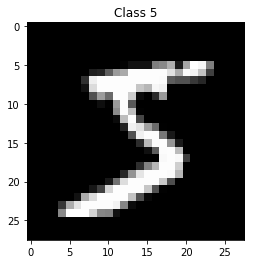

In [3]:
#Visualisation of one particular image
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

The input shape that a CNN accepts should be in a specific format. If you are using Tensorflow, the format should be (batch, height, width, channels). If you are using Theano, the format should be (batch, channels, height, width).

In [4]:
#In CNN, we can normalize data before hands such that large terms of the calculations can be reduced to smaller terms.
#Like, we can normalize the x_train and x_test data by dividing it with 255.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
#As all the images are in grayscale, the number of channels is 1.
#If it was a color image, then the number of channels would be 3 (R, G, B).

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

# One-Hot Encoding
In one-hot encoding an integer is converted to an array which contains only one ‘1’ and the rest elements are ‘0’.

In [5]:
number_of_classes = 10
# convert class vectors to binary class matrices.One-Hot Encoding
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [6]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Polling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples


#There are two ways to build Keras models: sequential and functional.

#The sequential API allows you to create models layer-by-layer for most problems.
#It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

model = Sequential() 

#32 is number of filters and (3, 3) is the size of the filter.
#We also need to specify the shape of the input which is (28, 28, 1), but we have to specify it only once.
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

# ReLU
The second layer is the Activation layer. We have used ReLU (rectified linear unit) as our activation function. ReLU function is f(x) = max(0, x), where x is the input. It sets all negative values in the matrix ‘x’ to 0 and keeps all the other values constant. It is the most used activation function since it reduces training time

## MAXPOOLING
The third layer is the MaxPooling layer. MaxPooling layer is used to down-sample the input to enable the model to make assumptions about the features so as to reduce over-fitting. It also reduces the number of parameters to learn, reducing the training time.

### BatchNormalization
 It normalizes the matrix after it is been through a convolution layer so that the scale of each dimension remains the same. It reduces the training time significantly.

#### Flattening
After creating all the convolutional layers, we need to flatten them, so that they can act as an input to the Dense layers.

#### Dense Layers
Dense layers are keras’s alias for Fully connected layers. These layers give the ability to classify the features learned by the CNN.

#### Dropout
Dropout is the method used to reduce overfitting. It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase. In our model, dropout will randomnly disable 20% of the neurons.

The second last layer is the Dense layer with 10 neurons. The neurons in this layer should be equal to the number of classes we want to predict as this is the output layer.

#### Softmax Activation 
The last layer is the Softmax Activation layer. Softmax activation enables us to calculate the output based on the probabilities. Each class is assigned a probability and the class with the maximum probability is the model’s output for the input.



In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 64)        0         
__________

In [8]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Data Augmentation
To reduce over-fitting, we use another technique known as Data Augmentation. Data augmentation rotates, shears, zooms, etc the image so that the model learns to generalize and not remember specific data.

In [9]:

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

# Batch Size
The batch size defines the number of samples that will be propagated through the network.

For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again.

In [10]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

# Epoch
A number of epochs means how many times you go through your training set

In [12]:
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5
937/937 [==============================] - 14s 15ms/step - loss: 0.0954 - acc: 0.9712 - val_loss: 0.0263 - val_acc: 0.9910
Epoch 2/5
937/937 [==============================] - 14s 15ms/step - loss: 0.0511 - acc: 0.9842 - val_loss: 0.0359 - val_acc: 0.9895
Epoch 3/5
937/937 [==============================] - 14s 15ms/step - loss: 0.0421 - acc: 0.9865 - val_loss: 0.0183 - val_acc: 0.9938
Epoch 4/5
937/937 [==============================] - 14s 15ms/step - loss: 0.0362 - acc: 0.9885 - val_loss: 0.0196 - val_acc: 0.9944
Epoch 5/5
937/937 [==============================] - 14s 15ms/step - loss: 0.0334 - acc: 0.9901 - val_loss: 0.0195 - val_acc: 0.9948


In [13]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 1s 97us/step

Test accuracy:  0.9949


We achived 99.55% accuracy using this simple model. To improve the result, we can do ensembling of models. We can also use pseudo labelling to improve the accuracy.